# Example plot using kilosort.data_tools

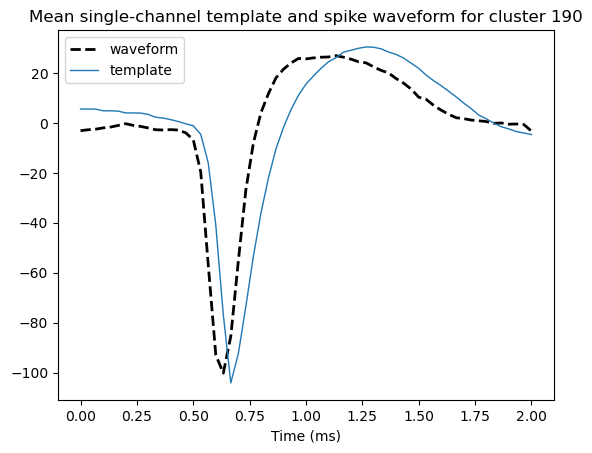

In [8]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from kilosort.io import load_ops
from kilosort.data_tools import mean_waveform, cluster_templates, get_good_cluster


# Indicate where sorting results were saved
results_dir = Path('d:/.kilosort/.test_data/kilosort4')

# Pick a random good cluster
cluster_id = get_good_cluster(results_dir, n=1)

# Get the mean spike waveform and mean templates for the cluster
mean_wv = mean_waveform(cluster_id, results_dir, n_spikes=100, bfile=None, best=True)
mean_temp = cluster_templates(cluster_id, results_dir, mean=True, best=True)

# Get time in ms for visualization
ops = load_ops(results_dir / 'ops.npy')
t = (np.arange(ops['nt']) / ops['fs']) * 1000

fig, ax = plt.subplots(1,1)
ax.plot(t, mean_wv, c='black', linestyle='dashed', linewidth=2, label='waveform')
ax.plot(t, mean_temp, linewidth=1, label='template')
ax.set_title(f'Mean single-channel template and spike waveform for cluster {cluster_id}')
ax.set_xlabel('Time (ms)')
ax.legend()